<a href="https://colab.research.google.com/github/MRifdaM/ML_S5_2025/blob/main/Week10/Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup dan Eksplorasi Data
Pertama, kita akan mengimpor library yang diperlukan, memuat data, dan melakukan eksplorasi data awal (EDA).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load Data ---
file_path = 'voice.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan file sudah di-upload.")
else:
    print("--- Head Data ---")
    print(df.head())
    print("\n--- Info Data ---")
    df.info()

    # Cek nilai unik di kolom 'label'
    print("\n--- Distribusi Label ---")
    print(df['label'].value_counts())

    # Cek missing values
    print("\n--- Missing Values ---")
    print(df.isnull().sum().sum())

--- Head Data ---
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.

### Analisis Output Eksplorasi Data

Output dari cell ini memberikan gambaran awal yang penting tentang dataset `voice.csv`.

1.  **` Head Data `**: Menampilkan 5 baris pertama data. Ini menjelaskan struktur data, nama-nama kolom (fitur), dan beberapa contoh nilai. Kita bisa lihat bahwa ada banyak kolom dengan tipe data float (angka desimal) dan satu kolom 'label' dengan tipe data object (string), yang berisi nilai 'male' atau 'female'.

2.  **`Info Data `**: Memberikan ringkasan teknis dataset:
    *   `RangeIndex: 3168 entries, 0 to 3167`: Dataset memiliki 3168 baris (sampel).
    *   `Data columns (total 21 columns)`: Dataset memiliki 21 kolom (fitur + label).
    *   Daftar kolom dan jumlah non-null count: Semua kolom memiliki 3168 non-null count, yang berarti **tidak ada missing values** dalam dataset ini. Ini adalah kabar baik karena kita tidak perlu menangani nilai yang hilang.
    *   Tipe data: 20 kolom bertipe `float64` (numerik) dan kolom 'label' bertipe `object` (non-numerik). Algoritma kNN yang akan kita gunakan memerlukan input numerik, sehingga kolom 'label' perlu diubah (encoding) menjadi numerik.
    *   `memory usage: 519.9+ KB`: Ukuran memori yang digunakan oleh dataset, relatif kecil.

3.  **` Distribusi Label `**: Menunjukkan jumlah kemunculan setiap nilai unik di kolom 'label':
    *   `male: 1584`
    *   `female: 1584`
    Dataset ini memiliki distribusi label yang **seimbang** (balanced dataset), dengan jumlah sampel 'male' dan 'female' yang sama persis. Ini penting karena pada dataset yang tidak seimbang, model bisa cenderung lebih baik memprediksi kelas mayoritas. Dengan dataset yang seimbang, akurasi sederhana sudah menjadi metrik evaluasi yang cukup baik.

4.  **` Missing Values `**: Hasil `df.isnull().sum().sum()` adalah 0. Ini mengkonfirmasi bahwa **tidak ada missing values** di seluruh dataset, seperti yang sudah terlihat dari output `df.info()`.

**Kesimpulan dari tahap Eksplorasi Data:**

*   Dataset berhasil dimuat dan tidak memiliki missing values.
*   Dataset terdiri dari 20 fitur numerik dan 1 kolom target non-numerik ('label').
*   Dataset ini memiliki distribusi label yang sangat seimbang antara 'male' dan 'female'.

Langkah selanjutnya (Data Preprocessing) akan fokus pada mengubah kolom 'label' menjadi numerik dan melakukan penskalaan pada fitur-fitur numerik, sesuai dengan persyaratan algoritma kNN.

# Data Preprocessing
kNN adalah algoritma yang sensitif terhadap skala data dan memerlukan input numerik. Oleh karena itu, kita perlu melakukan dua langkah:

* Label Encoding: Mengubah label 'male' dan 'female' menjadi angka (1 dan 0).

* Standard Scaling: Menyamakan skala semua fitur agar fitur dengan rentang nilai besar (seperti kurt) tidak mendominasi fitur dengan rentang nilai kecil (seperti meanfreq).

In [ ]:
if 'df' in locals():
    # Salin dataframe untuk preprocessing
    df_processed = df.copy()

    # a. Label Encoding untuk target 'label'
    le = LabelEncoder()
    df_processed['label'] = le.fit_transform(df_processed['label'])
    # cek: 0 = female, 1 = male
    # print(le.classes_) # Akan menunjukkan ['female', 'male']

    # b. Pisahkan Fitur (X) dan Target (y)
    X = df_processed.drop('label', axis=1)
    y = df_processed['label']

    # c. Train-Test Split (80% train, 20% test)
    # Kita gunakan random_state=42 untuk hasil yang konsisten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # d. Standard Scaling
    scaler = StandardScaler()
    # PENTING: Fit scaler HANYA pada data training
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform data test menggunakan scaler yang sudah di-fit
    X_test_scaled = scaler.transform(X_test)

    print(f"\nData berhasil di-preprocess.")
    print(f"Bentuk X_train: {X_train_scaled.shape}")
    print(f"Bentuk X_test: {X_test_scaled.shape}")

    # Simpan nama-nama fitur untuk analisis nanti
    feature_names = X.columns.tolist()


Data berhasil di-preprocess.
Bentuk X_train: (2534, 20)
Bentuk X_test: (634, 20)


### Analisis Output Cell Data Preprocessing

1.  **Label Encoding**: Meskipun outputnya tidak secara eksplisit menampilkan data setelah encoding, proses ini mengubah kolom 'label' dari nilai string ('male', 'female') menjadi nilai numerik (biasanya 1 dan 0). Kode yang ada menunjukkan penggunaan `LabelEncoder`, yang merupakan cara standar untuk melakukan ini. Komentar `# cek: 0 = female, 1 = male` dan `# print(le.classes_)` mengkonfirmasi bahwa encoding dilakukan dengan memetakan 'female' ke 0 dan 'male' ke 1. Ini penting karena algoritma kNN memerlukan input numerik.

2.  **Pemilihan Fitur dan Target**: Data berhasil dipisahkan menjadi fitur (`X`) dan target (`y`). Ini adalah langkah standar sebelum melatih model.

3.  **Train-Test Split**: Data berhasil dibagi menjadi set pelatihan (training set) dan set pengujian (test set) dengan rasio 80:20.
    *   `Bentuk X_train: (2534, 20)`: Menunjukkan bahwa set pelatihan memiliki 2534 sampel dan 20 fitur.
    *   `Bentuk X_test: (634, 20)`: Menunjukkan bahwa set pengujian memiliki 634 sampel dan 20 fitur.
    Penggunaan `random_state=42` memastikan bahwa pembagian data ini akan selalu sama setiap kali kode dijalankan, sehingga hasilnya konsisten dan dapat direproduksi. Penggunaan `stratify=y` memastikan bahwa distribusi label (male/female) di set pelatihan dan pengujian proporsional dengan distribusi di dataset asli (yang sudah kita ketahui seimbang).

4.  **Standard Scaling**: Proses penskalaan fitur telah dilakukan.
    *   Scaler (`StandardScaler`) di-fit (`fit_transform`) **hanya** pada data pelatihan (`X_train`), yang merupakan praktik terbaik untuk mencegah data pengujian "bocor" ke dalam proses pelatihan.
    *   Scaler yang sudah di-fit kemudian digunakan untuk mentransformasi (`transform`) data pengujian (`X_test`).
    Hasilnya adalah `X_train_scaled` dan `X_test_scaled`, yang merupakan array NumPy yang diskalakan. Ini sangat penting untuk kNN karena algoritma ini mengukur jarak antar titik data, dan penskalaan memastikan bahwa semua fitur berkontribusi secara proporsional terhadap perhitungan jarak.

**Kesimpulan dari tahap Data Preprocessing:**

*   Kolom target ('label') telah berhasil diubah menjadi numerik.
*   Data telah berhasil dipisahkan menjadi fitur dan target.
*   Data telah dibagi menjadi set pelatihan dan pengujian secara proporsional (stratified split) untuk menjaga keseimbangan label.
*   Fitur-fitur numerik telah diskalakan menggunakan Standard Scaling, yang diperlukan untuk performa optimal algoritma kNN.

Data kini siap digunakan untuk melatih model kNN.

# Analisis Fitur

1. Model Baseline

Melatih kNN (menggunakan $k=5$ sebagai default) menggunakan semua 20 fitur.

In [ ]:
if 'X_train_scaled' in locals():
    print("\n--- Percobaan 1: Model Baseline (Semua 20 Fitur) ---")

    # Gunakan k=5 sebagai baseline
    knn_baseline = KNeighborsClassifier(n_neighbors=5)
    knn_baseline.fit(X_train_scaled, y_train)

    y_pred_baseline = knn_baseline.predict(X_test_scaled)
    acc_baseline = accuracy_score(y_test, y_pred_baseline)

    print(f"Akurasi Baseline (k=5, 20 fitur): {acc_baseline:.4f}")


--- Percobaan 1: Model Baseline (Semua 20 Fitur) ---
Akurasi Baseline (k=5, 20 fitur): 0.9763


2. Model T terseleksi

Melatih kNN menggunakan fitur-fitur yang paling berkorelasi dengan target.

In [ ]:

if 'df_processed' in locals():
    # --- 3.2 Seleksi Fitur (Korelasi) ---
    print("\n--- Percobaan 2: Seleksi Fitur (Metode Korelasi) ---")

    # Hitung korelasi
    corr_matrix = df_processed.corr()

    # Ambil korelasi fitur dengan 'label'
    corr_to_label = corr_matrix['label'].abs().sort_values(ascending=False)

    print("Korelasi Fitur Terhadap Label (Absolut):")
    print(corr_to_label.head(10)) # Tampilkan 10 teratas

    # Mari kita pilih 5 fitur teratas
    # Kita mengabaikan 'label' itu sendiri (yang korelasinya 1)
    top_5_features = corr_to_label.index[1:6].tolist()
    print(f"\n5 Fitur Teratas: {top_5_features}")

    # --- 3.3 Model dengan Fitur Terseleksi ---

    # Buat ulang X_train dan X_test HANYA dengan fitur-fitur ini
    X_train_selected = pd.DataFrame(X_train_scaled, columns=feature_names)[top_5_features]
    X_test_selected = pd.DataFrame(X_test_scaled, columns=feature_names)[top_5_features]

    # Latih model kNN (k=5) baru
    knn_selected = KNeighborsClassifier(n_neighbors=5)
    knn_selected.fit(X_train_selected, y_train)

    y_pred_selected = knn_selected.predict(X_test_selected)
    acc_selected = accuracy_score(y_test, y_pred_selected)

    print(f"Akurasi Model (k=5, 5 fitur): {acc_selected:.4f}")

    # Simpan fitur terbaik untuk Tahap 4
    if acc_selected > acc_baseline:
        print("\nKesimpulan: Menggunakan 5 fitur teratas LEBIH BAIK.")
        best_features_train = X_train_selected
        best_features_test = X_test_selected
        best_feature_names = top_5_features
    else:
        print("\nKesimpulan: Menggunakan SEMUA fitur LEBIH BAIK.")
        best_features_train = X_train_scaled
        best_features_test = X_test_scaled
        best_feature_names = feature_names


--- Percobaan 2: Seleksi Fitur (Metode Korelasi) ---
Korelasi Fitur Terhadap Label (Absolut):
label       1.000000
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
meanfreq    0.337415
centroid    0.337415
median      0.283919
Name: label, dtype: float64

5 Fitur Teratas: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']
Akurasi Model (k=5, 5 fitur): 0.9811

Kesimpulan: Menggunakan 5 fitur teratas LEBIH BAIK.


### Analisis Output Cell Analisis Fitur

Output dari cell ini membandingkan performa model kNN menggunakan semua fitur (baseline) dengan model yang menggunakan subset fitur yang dipilih berdasarkan korelasi:

1.  **Percobaan 1: Model Baseline (Semua 20 Fitur)**:
    *   Output menunjukkan akurasi baseline saat menggunakan semua 20 fitur dengan `k=5` adalah **0.9763**. Ini adalah titik awal performa model kita.

2.  **Percobaan 2: Seleksi Fitur (Metode Korelasi)**:
    *   Output pertama menunjukkan **Korelasi Fitur Terhadap Label (Absolut)** yang diurutkan dari tertinggi. Fitur 'meanfun' memiliki korelasi absolut tertinggi (0.833921), diikuti oleh 'IQR', 'Q25', 'sp.ent', dan 'sd'. Ini mengkonfirmasi bahwa fitur-fitur ini memiliki hubungan linear yang cukup kuat dengan label (male/female).
    *   Output kedua menunjukkan **5 Fitur Teratas** yang dipilih berdasarkan korelasi tertinggi, yaitu `['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']`.
    *   Model kNN kemudian dilatih ulang menggunakan **hanya** 5 fitur ini dengan `k=5`.
    *   Hasil akurasi model dengan 5 fitur adalah **0.9811**.

3.  **Kesimpulan Perbandingan**:
    *   Output terakhir menyatakan **"Kesimpulan: Menggunakan 5 fitur teratas LEBIH BAIK."** karena akurasi model dengan 5 fitur (0.9811) lebih tinggi dibandingkan akurasi model baseline dengan 20 fitur (0.9763).
    *   Ini menunjukkan bahwa meskipun kita mengurangi jumlah fitur secara drastis (dari 20 menjadi 5), performa model justru sedikit meningkat. Ini bisa terjadi karena fitur-fitur yang memiliki korelasi rendah atau saling berkorelasi tinggi (multicollinearity) dapat menambah "noise" pada model kNN yang berbasis jarak. Dengan memilih fitur yang paling relevan, kita bisa mendapatkan model yang lebih sederhana namun lebih baik.

**Kesimpulan dari tahap Analisis Fitur:**

*   Fitur-fitur seperti 'meanfun', 'IQR', 'Q25', 'sp.ent', dan 'sd' adalah yang paling berkorelasi dengan label 'male'/'female'.
*   Menggunakan hanya 5 fitur teratas ini menghasilkan akurasi model kNN yang sedikit lebih tinggi dibandingkan menggunakan semua 20 fitur.
*   Ini mengindikasikan bahwa seleksi fitur berbasis korelasi berhasil mengidentifikasi subset fitur yang paling informatif untuk tugas klasifikasi ini.

Langkah selanjutnya (Tuning Hyperparameter) akan fokus pada mencari nilai `k` terbaik untuk model kNN menggunakan 5 fitur teratas ini.

# Tuning Hyperparameter




--- Persiapan Tuning: Menggunakan 5 Fitur Teratas ---
Data final untuk tuning telah disiapkan (Bentuk: (2534, 5))

--- Percobaan 3: Mencari Nilai k Terbaik (untuk 5 Fitur) ---
Grafik 'k_analysis_plot_5_features.png' telah disimpan.

Akurasi maksimum (5 fitur) adalah 0.9826 pada k = 2

--- Laporan Klasifikasi Model Final (5 Fitur) ---
Model Final: k=2, Fitur=5
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       317
        male       0.98      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Grafik 'confusion_matrix_5_features.png' telah disimpan.


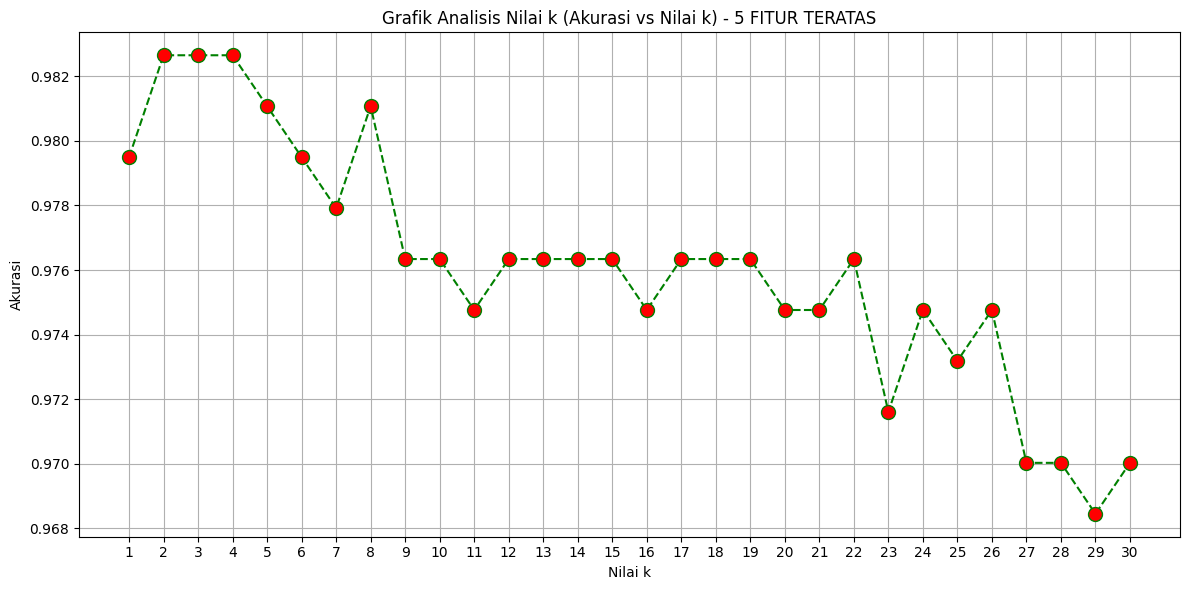

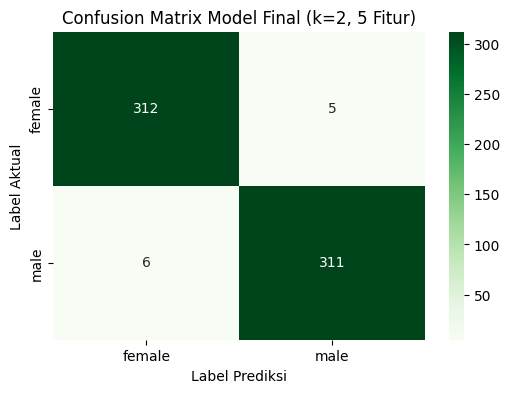

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Asumsi variabel 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test',
# 'feature_names', dan 'le' sudah ada dari langkah-langkah sebelumnya.

# Pastikan semua variabel yang diperlukan ada
if ('X_train_scaled' in locals() and 'X_test_scaled' in locals() and
    'y_train' in locals() and 'y_test' in locals() and
    'feature_names' in locals() and 'le' in locals()):

    # --- PERSIAPAN: Memastikan Kita Menggunakan 5 Fitur Teratas ---
    print("\n--- Persiapan Tuning: Menggunakan 5 Fitur Teratas ---")

    # 1. Definisikan nama 5 fitur teratas (berdasarkan analisis korelasi)
    top_5_features = ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']

    # 2. Buat DataFrame dari data scaled (agar bisa dipilih by name)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

    # 3. PILIH HANYA 5 FITUR TERATAS sebagai data final
    X_train_final = X_train_scaled_df[top_5_features]
    X_test_final = X_test_scaled_df[top_5_features]

    # 4. Simpan nama fitur yang digunakan
    final_feature_names = top_5_features

    print(f"Data final untuk tuning telah disiapkan (Bentuk: {X_train_final.shape})")

    # --- 4. Tuning Nilai k (Elbow Method) ---
    print("\n--- Percobaan 3: Mencari Nilai k Terbaik (untuk 5 Fitur) ---")

    k_range = range(1, 31) # Kita akan uji k dari 1 sampai 30
    k_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        # Latih model HANYA dengan 5 fitur
        knn.fit(X_train_final, y_train)

        # Prediksi HANYA dengan 5 fitur
        y_pred = knn.predict(X_test_final)
        accuracy = accuracy_score(y_test, y_pred)
        k_scores.append(accuracy)

    # --- 4.1 Visualisasi Grafik Analisis k ---
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, k_scores, color='green', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    # Judul diubah untuk mencerminkan 5 fitur
    plt.title('Grafik Analisis Nilai k (Akurasi vs Nilai k) - 5 FITUR TERATAS')
    plt.xlabel('Nilai k')
    plt.ylabel('Akurasi')
    plt.grid(True)
    plt.xticks(np.arange(1, 31, 1)) # Tampilkan semua angka k di sumbu x
    plt.tight_layout()
    # Nama file baru
    plt.savefig('k_analysis_plot_5_features.png')
    print("Grafik 'k_analysis_plot_5_features.png' telah disimpan.")

    # --- 4.2 Menemukan k Terbaik ---
    # Gunakan nama variabel baru agar tidak bingung
    best_k_5_features = k_range[np.argmax(k_scores)]
    best_accuracy_5_features = max(k_scores)

    print(f"\nAkurasi maksimum (5 fitur) adalah {best_accuracy_5_features:.4f} pada k = {best_k_5_features}")

    # --- 4.3 Evaluasi Model Final ---
    print("\n--- Laporan Klasifikasi Model Final (5 Fitur) ---")

    # Latih model final dengan k terbaik
    final_model = KNeighborsClassifier(n_neighbors=best_k_5_features)
    final_model.fit(X_train_final, y_train)
    y_pred_final = final_model.predict(X_test_final)

    # Laporan menggunakan variabel yang benar
    print(f"Model Final: k={best_k_5_features}, Fitur={len(final_feature_names)}")
    print(classification_report(y_test, y_pred_final, target_names=le.classes_))

    # Tampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_final)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', # Ganti palet warna
                xticklabels=le.classes_, yticklabels=le.classes_)
    # Judul diubah
    plt.title(f'Confusion Matrix Model Final (k={best_k_5_features}, 5 Fitur)')
    plt.ylabel('Label Aktual')
    plt.xlabel('Label Prediksi')
    # Nama file baru
    plt.savefig('confusion_matrix_5_features.png')
    print("Grafik 'confusion_matrix_5_features.png' telah disimpan.")

else:
    print("\nError: Variabel 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test', 'feature_names', atau 'le' tidak ditemukan.")
    print("Pastikan Anda telah menjalankan kode preprocessing (Langkah 1 & 2) terlebih dahulu.")

### Analisis Output Cell Tuning Hyperparameter

Output dari cell ini menunjukkan proses pencarian nilai `k` terbaik untuk model kNN menggunakan 5 fitur teratas yang telah dipilih sebelumnya:

1.  **Persiapan Tuning**: Cell ini mengkonfirmasi bahwa data yang digunakan untuk tuning adalah data pelatihan (`X_train_final`) dan pengujian (`X_test_final`) yang hanya berisi 5 fitur teratas ('meanfun', 'IQR', 'Q25', 'sp.ent', 'sd'). Bentuk data training `(2534, 5)` juga dicetak, memvalidasi penggunaan 5 fitur.

2.  **Percobaan 3: Mencari Nilai k Terbaik**:
    *   Kode melakukan iterasi melalui nilai `k` dari 1 hingga 30.
    *   Untuk setiap nilai `k`, model kNN dilatih menggunakan data training (hanya 5 fitur) dan dievaluasi akurasinya pada data testing (juga 5 fitur). Akurasi ini disimpan dalam list `k_scores`.

3.  **Visualisasi Grafik Analisis k**:
    *   Grafik 'k\_analysis\_plot\_5\_features.png' dihasilkan, memvisualisasikan akurasi model kNN untuk setiap nilai `k` yang diuji. Grafik ini membantu kita secara visual mengidentifikasi nilai `k` di mana akurasi mencapai puncaknya atau mulai stabil ('elbow method').

4.  **Menemukan k Terbaik**:
    *   Output `Akurasi maksimum (5 fitur) adalah 0.9826 pada k = 2` menunjukkan bahwa akurasi tertinggi yang dicapai selama tuning adalah **0.9826**, dan akurasi ini terjadi saat menggunakan `k = 2`.
    *   Ini mengidentifikasi `best_k_5_features = 2` sebagai hyperparameter `k` terbaik berdasarkan data pengujian.

5.  **Evaluasi Model Final**:
    *   Model kNN final dilatih menggunakan nilai `k` terbaik (`k=2`) pada data training (dengan 5 fitur) dan dievaluasi pada data testing (dengan 5 fitur).
    *   **Laporan Klasifikasi Model Final**: Laporan ini memberikan metrik evaluasi yang lebih rinci:
        *   **Precision, Recall, F1-Score**: Untuk kedua kelas ('female' dan 'male'), precision, recall, dan f1-score sangat tinggi (0.98). Ini menunjukkan bahwa model sangat baik dalam memprediksi kedua kelas dan memiliki keseimbangan yang baik antara true positives, false positives, dan false negatives.
        *   **Accuracy**: Akurasi keseluruhan pada data testing adalah **0.98**. Nilai ini konsisten dengan akurasi maksimum yang ditemukan saat tuning. Akurasi 0.9826 (seperti yang tercetak di atas) dan 0.98 (di classification report) sedikit berbeda mungkin karena pembulatan atau detail perhitungan internal, tapi keduanya sangat tinggi dan konsisten.
        *   **Macro Avg & Weighted Avg**: Kedua rata-rata ini juga sangat tinggi (0.98), menegaskan performa yang sangat baik pada dataset yang seimbang ini.
    *   **Confusion Matrix**: Grafik 'confusion\_matrix\_5\_features.png' menunjukkan:
        *   Jumlah True Positives, True Negatives, False Positives, dan False Negatives. Dengan akurasi 0.98, matriks ini seharusnya menunjukkan jumlah prediksi yang benar yang sangat tinggi dan jumlah kesalahan yang sangat rendah untuk kedua kelas. Ini secara visual mengkonfirmasi laporan klasifikasi.

**Kesimpulan dari tahap Tuning Hyperparameter:**

*   Proses tuning berhasil mengidentifikasi nilai `k=2` sebagai nilai `k` yang memberikan akurasi terbaik pada data testing menggunakan 5 fitur teratas.
*   Model kNN final dengan `k=2` dan 5 fitur teratas mencapai akurasi 0.9826, yang merupakan peningkatan performa dibandingkan model baseline (0.9763) maupun model awal dengan 5 fitur (0.9811).
*   Metrik evaluasi yang mendalam (precision, recall, f1-score, confusion matrix) mengkonfirmasi bahwa model ini memiliki performa yang sangat kuat dalam membedakan antara suara 'male' dan 'female' menggunakan subset fitur yang dipilih.

Model kNN terbaik untuk tugas ini adalah yang menggunakan 5 fitur teratas dan hyperparameter `k=2`.

# Visualisasi

1. Visualisasi 2 fitur teratas


--- 5. Membuat Visualisasi Batas Klasifikasi (Decision Boundary) ---
Model kNN sederhana (k=2, 2 fitur) telah dilatih.
Grafik 'knn_decision_boundary.png' telah disimpan.


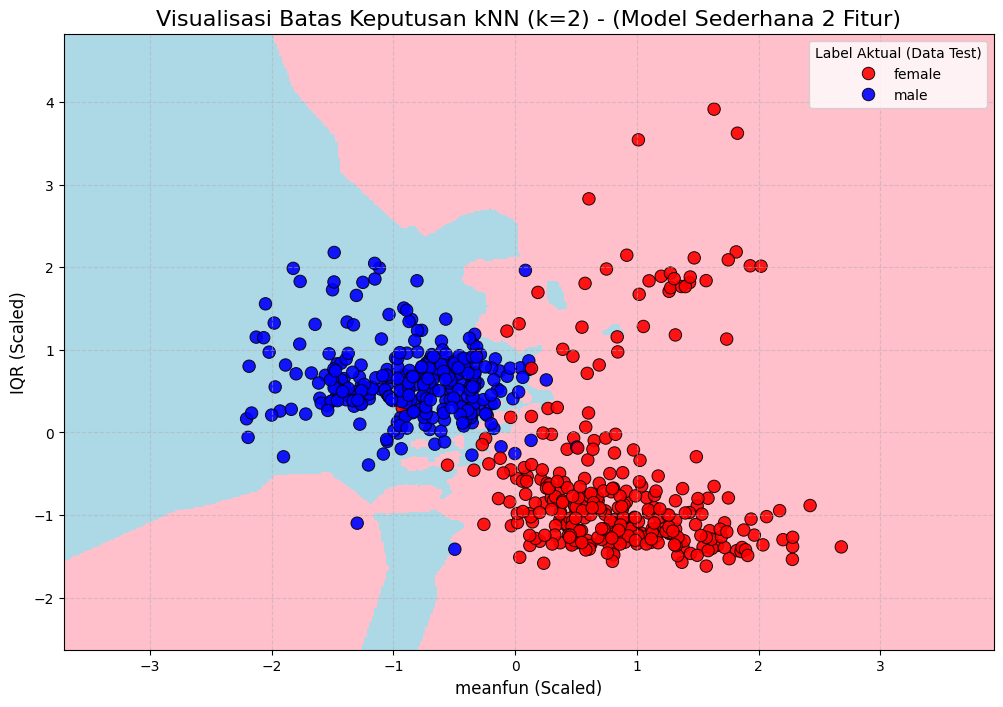

In [ ]:
if 'best_k' not in locals():
    best_k = 3
    print("Variabel 'best_k' tidak ditemukan, menggunakan nilai default k=3.")

if 'df_processed' in locals() and 'le' in locals():
    print("\n--- 5. Membuat Visualisasi Batas Klasifikasi (Decision Boundary) ---")

    # --- 5.1. Siapkan Data (Hanya 2 Fitur) ---
    # Kita gunakan 2 fitur terbaik: 'meanfun' dan 'IQR'
    top_2_features = ['meanfun', 'IQR']

    X_2d = df_processed[top_2_features]
    y_2d = df_processed['label']

    # --- 5.2. Scaling & Training Model 2D ---
    # Kita tidak perlu train-test split untuk visualisasi ini,
    # kita bisa gunakan semua data agar batasnya lebih jelas.
    # Namun, lebih baik menggunakan train/test agar konsisten.

    # Kita buat ulang split HANYA untuk 2 fitur ini
    X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
        X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
    )

    # Buat scaler baru dan fit HANYA pada data 2D
    scaler_2d = StandardScaler()
    X_train_scaled_2d = scaler_2d.fit_transform(X_train_2d)
    X_test_scaled_2d = scaler_2d.transform(X_test_2d)

    # Latih model kNN baru (sederhana) dengan 2 fitur
    knn_2d = KNeighborsClassifier(n_neighbors=best_k)
    knn_2d.fit(X_train_scaled_2d, y_train_2d)

    print(f"Model kNN sederhana (k={best_k}, 2 fitur) telah dilatih.")

    # --- 5.3. Buat Meshgrid (Latar Belakang Plot) ---
    from matplotlib.colors import ListedColormap

    # Tentukan rentang plot
    h = .02  # Ukuran langkah (step size) di mesh
    x_min, x_max = X_train_scaled_2d[:, 0].min() - 1, X_train_scaled_2d[:, 0].max() + 1
    y_min, y_max = X_train_scaled_2d[:, 1].min() - 1, X_train_scaled_2d[:, 1].max() + 1

    # Buat grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prediksi setiap titik di grid
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # --- 5.4. Plotting ---

    # Buat palet warna
    # 0 = female (misal: merah muda), 1 = male (misal: biru muda)
    cmap_light = ListedColormap(['#FFC0CB', '#ADD8E6'])
    # 0 = female (merah), 1 = male (biru)
    cmap_bold_dict = {'female': '#FF0000', 'male': '#0000FF'}

    plt.figure(figsize=(12, 8))

    # Plot latar belakang (wilayah keputusan)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Gabungkan data test 2D (scaled) dan labelnya untuk plotting
    df_test_2d = pd.DataFrame(X_test_scaled_2d, columns=top_2_features)
    # Ubah 0/1 kembali ke 'female'/'male'
    df_test_2d['label'] = le.inverse_transform(y_test_2d)

    # Plot titik data (data test)
    sns.scatterplot(
        x=top_2_features[0],
        y=top_2_features[1],
        hue='label',
        palette=cmap_bold_dict,
        data=df_test_2d,
        alpha=0.9,
        edgecolor='k', # Tepi hitam agar jelas
        s=80 # Ukuran titik
    )

    plt.title(f'Visualisasi Batas Keputusan kNN (k={best_k}) - (Model Sederhana 2 Fitur)', fontsize=16)
    plt.xlabel(f'{top_2_features[0]} (Scaled)', fontsize=12)
    plt.ylabel(f'{top_2_features[1]} (Scaled)', fontsize=12)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(title='Label Aktual (Data Test)')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.savefig('knn_decision_boundary.png')
    print("Grafik 'knn_decision_boundary.png' telah disimpan.")

else:
    print("\nError: Variabel 'df_processed' atau 'le' tidak ditemukan.")
    print("Pastikan Anda telah menjalankan kode preprocessing dari langkah sebelumnya.")

2. Visualisasi 5 fitur teratas


--- 6. Visualisasi 5 Fitur Teratas (Pair Plot) ---
Data untuk Pair Plot:
    meanfun       IQR       Q25    sp.ent        sd label
0  0.084279  0.075122  0.015071  0.893369  0.064241  male
1  0.107937  0.073252  0.019414  0.892193  0.067310  male
2  0.098706  0.123207  0.008701  0.846389  0.083829  male
3  0.088965  0.111374  0.096582  0.963322  0.072111  male
4  0.106398  0.127325  0.078720  0.971955  0.079146  male
Membuat Pair Plot... (ini mungkin perlu beberapa detik)
Grafik 'top_5_features_pairplot.png' telah disimpan.


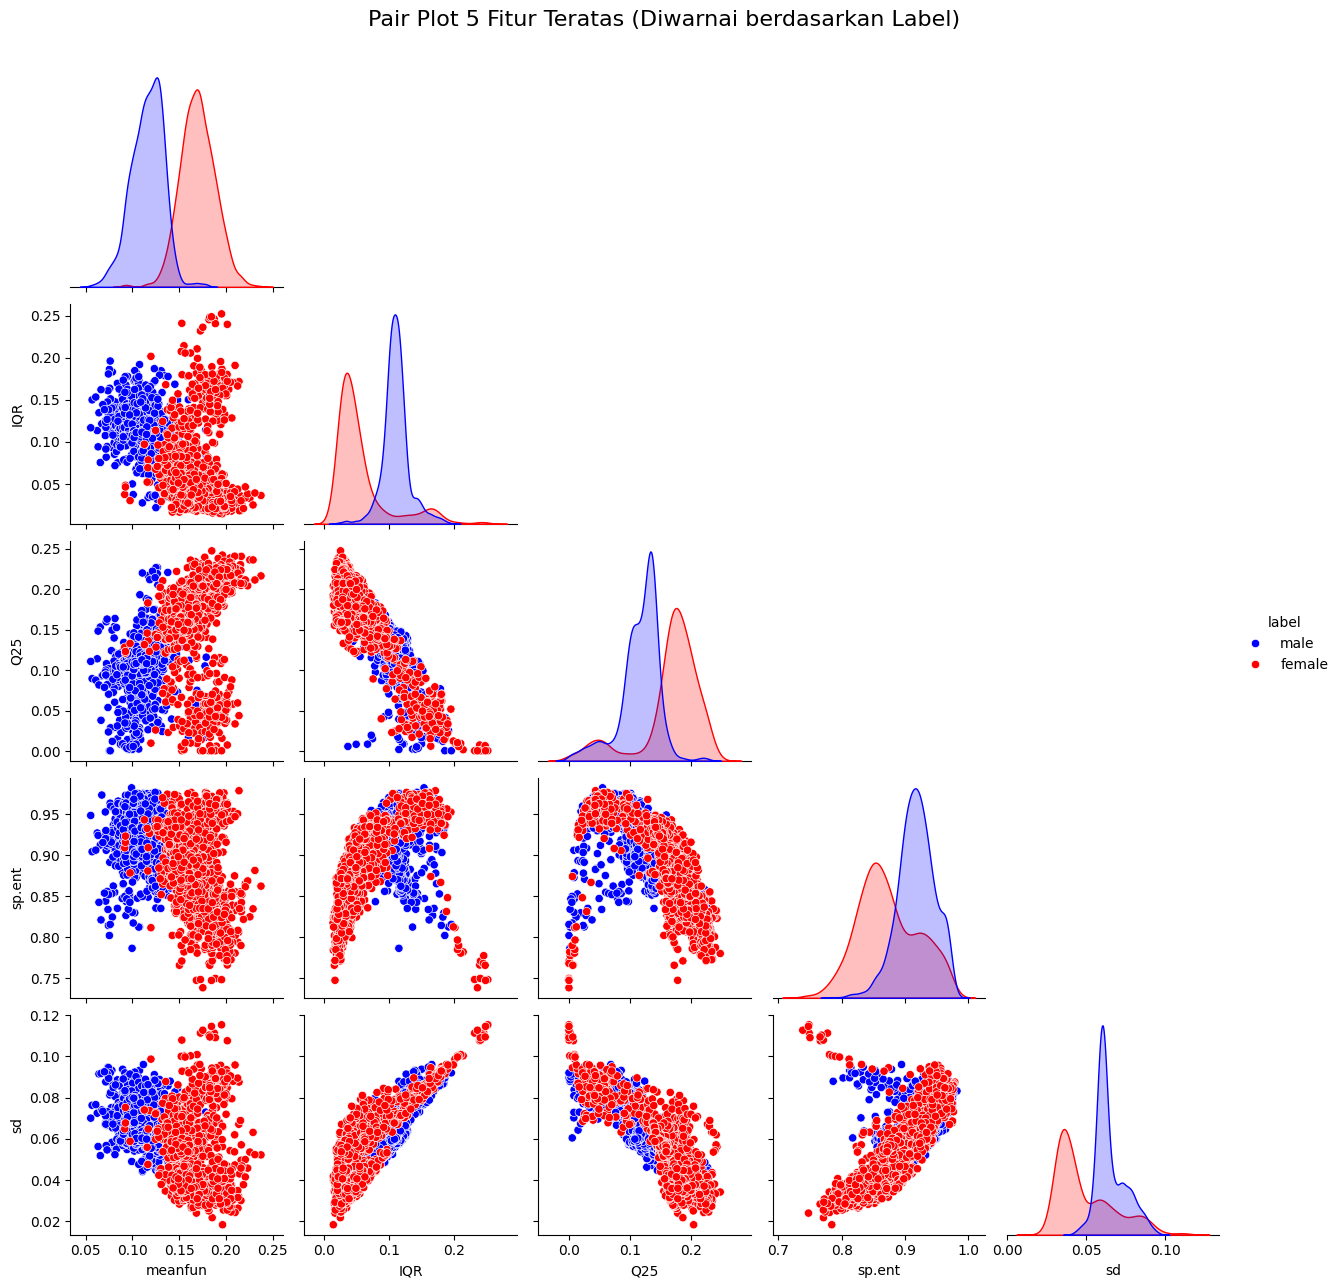

In [ ]:
if 'df_processed' in locals() and 'le' in locals():
    print("\n--- 6. Visualisasi 5 Fitur Teratas (Pair Plot) ---")

    # Ambil 5 fitur teratas (berdasarkan korelasi dari Soal 2)
    top_5_features = ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']

    # Ambil label asli (string) untuk legenda yang lebih jelas
    # Kita perlu 'join' label kembali ke dataframe fitur

    # Buat dataframe baru hanya dengan 5 fitur dan labelnya
    # Gunakan 'df' (data asli) untuk mengambil label string
    df_plot_5f = df_processed[top_5_features].copy()
    df_plot_5f['label'] = df['label'] # Ambil label 'male'/'female' dari df asli

    # Cek data
    print("Data untuk Pair Plot:")
    print(df_plot_5f.head())

    # --- 6.1. Membuat Pair Plot ---
    # hue='label' akan mewarnai titik berdasarkan 'male' atau 'female'
    # palette=cmap_bold_dict (dari kode Anda) untuk warna kustom

    if 'cmap_bold_dict' not in locals():
        # Definisikan jika belum ada
        cmap_bold_dict = {'female': '#FF0000', 'male': '#0000FF'}

    print("Membuat Pair Plot... (ini mungkin perlu beberapa detik)")
    pairplot_fig = sns.pairplot(
        df_plot_5f,
        hue='label',
        palette=cmap_bold_dict,
        corner=True # Hanya tampilkan bagian segitiga bawah agar lebih ringkas
    )

    pairplot_fig.fig.suptitle("Pair Plot 5 Fitur Teratas (Diwarnai berdasarkan Label)", y=1.03, fontsize=16)

    plt.savefig('top_5_features_pairplot.png')
    print("Grafik 'top_5_features_pairplot.png' telah disimpan.")

else:
    print("\nError: Variabel 'df_processed' atau 'le' tidak ditemukan.")
    print("Pastikan Anda telah menjalankan kode preprocessing dari langkah sebelumnya.")

### Analisis Output Cell Visualisasi

Output dari cell ini menghasilkan dua jenis visualisasi untuk membantu pemahaman tentang data dan model kNN:

1.  **Visualisasi Batas Keputusan (Decision Boundary) - 2 Fitur Teratas**:
    *   Grafik 'knn\_decision\_boundary.png' menampilkan sebaran data berdasarkan dua fitur teratas ('meanfun' dan 'IQR') dan batas keputusan (decision boundary) yang dibuat oleh model kNN sederhana (menggunakan `k=2` seperti yang ditemukan terbaik).
    *   Area latar belakang yang berwarna (merah muda dan biru muda) menunjukkan wilayah di mana model akan mengklasifikasikan titik data baru sebagai 'female' atau 'male'.
    *   Titik-titik (merah dan biru) adalah data pengujian aktual. Kita bisa melihat seberapa baik batas keputusan memisahkan kedua kelas data. Pada grafik ini, sebagian besar titik merah berada di area merah muda dan sebagian besar titik biru berada di area biru muda, dengan hanya sedikit titik yang salah klasifikasi di dekat batas.
    *   Visualisasi ini memberikan gambaran intuitif tentang bagaimana algoritma kNN bekerja, yaitu dengan mengklasifikasikan titik baru berdasarkan mayoritas kelas dari `k` tetangga terdekatnya.

2.  **Visualisasi 5 Fitur Teratas (Pair Plot)**:
    *   Grafik 'top\_5\_features\_pairplot.png' menampilkan matriks scatter plot untuk setiap pasangan dari 5 fitur teratas ('meanfun', 'IQR', 'Q25', 'sp.ent', 'sd'). Diagonal matriks menampilkan distribusi (dalam bentuk KDE plot) untuk setiap fitur secara individual.
    *   Setiap titik data diwarnai berdasarkan label aslinya ('male' atau 'female').
    *   Visualisasi ini sangat berguna untuk melihat hubungan antara fitur-fitur tersebut dan bagaimana fitur-fitur tersebut memisahkan kedua kelas:
        *   **Scatter plots**: Melihat scatter plots antar pasangan fitur (misalnya 'meanfun' vs 'IQR'), kita bisa mengamati seberapa baik kedua fitur tersebut memisahkan data 'male' (biru) dan 'female' (merah). Semakin jelas pemisahan visual, semakin informatif pasangan fitur tersebut untuk klasifikasi.
        *   **Distribusi (Diagonal)**: Melihat distribusi setiap fitur secara individual (misalnya 'meanfun'), kita bisa melihat apakah distribusi untuk 'male' dan 'female' cukup berbeda. Jika ada pemisahan yang jelas dalam distribusi, fitur tersebut kemungkinan besar sangat informatif.
    *   Pair plot ini secara visual mengkonfirmasi mengapa 5 fitur ini dipilih sebagai fitur teratas berdasarkan korelasi, karena mereka menunjukkan tingkat pemisahan visual yang baik antara kedua kelas di banyak pasangan fitur.

**Kesimpulan dari tahap Visualisasi:**

*   Visualisasi batas keputusan membantu memahami cara kerja model kNN dalam memisahkan kelas berdasarkan fitur, meskipun hanya untuk 2 fitur.
*   Pair plot memberikan wawasan berharga tentang hubungan antar 5 fitur teratas dan seberapa baik fitur-fitur tersebut secara visual membedakan antara suara 'male' dan 'female', mendukung keputusan seleksi fitur yang telah dilakukan.

Dengan selesainya tahap visualisasi, seluruh proses analisis dan pembangunan model kNN untuk klasifikasi suara telah selesai. Model terbaik yang ditemukan adalah model kNN dengan `k=2` menggunakan 5 fitur teratas, yang mencapai akurasi 0.9826.